# Stock Market Prediction using Random Forest

## Overview
In this project, we will be predicting the stock market using machine learning. We'll start out by downloading data on the S&P 500 Index using the Yahoo Finance package. Then we'll clean the data up and use it to train a model. Then we'll go back testing to actually figure out how good our model is and we'll add in some more predictors to improve our accuracy.<br>
By the end of this project we will have created a machine learning model that can predict tomorrow's S&P 500 index price trend. 

### Dataset
The dataset contains the following columns initially:
- `Index` - Date of trade.
- `Open` - Opening Price for the day.
- `High` - Highest Price attained for the day.
- `Low` - Lowest Price attained for the day.
- `Close` - Closing Price for the day.
- `Dividends` - The amount of Dividend distributed per unit on that day.
- `Stock Splits` - The number of stock splits which happened on that day.

## Loading S&P500 Data from yahoofinance
For this project we will be importing the yfinance package. This package calls the yahoo finance api to download daily stock and index prices.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

The first thing we'll do is we'll initialize something called a ___Ticker Class___ which will enable us to download price history for a single symbol in this case we will use the __GSPC__ symbol which is for the S&P 500 index.<br>
We'll pass in period = max which will query all data from the very beginning when the index was created. 

In [2]:
sp500 = yf.Ticker("^GSPC").history(period='max')
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,0.0,0.0
2025-01-28 00:00:00-05:00,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.0,0.0
2025-01-29 00:00:00-05:00,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,0.0,0.0


Here we have `dividends` and `Stock splits`. We basically do not need these and are going to remove them later on.

In [3]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-01-17 00:00:00-05:00', '2025-01-21 00:00:00-05:00',
               '2025-01-22 00:00:00-05:00', '2025-01-23 00:00:00-05:00',
               '2025-01-24 00:00:00-05:00', '2025-01-27 00:00:00-05:00',
               '2025-01-28 00:00:00-05:00', '2025-01-29 00:00:00-05:00',
               '2025-01-30 00:00:00-05:00', '2025-01-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24387, freq=None)

Here we can see that the data is indexed with the date of trade. All non-trading days are omitted here.

## Cleaning and Visualizing the Stock Market Data

Now, the first thing we are going to do is modify tthe index from date-time to just date. All the timings are same and we basically do not need those.<br>
If we were working on a very short time frame, we would have needed those time frames.

In [4]:
sp500.index = sp500.index.date 
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,0.0,0.0
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.0,0.0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,0.0,0.0
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,0.0,0.0


Another thing to notice is that, initally the stock had zero volume. So, we can just drop the rows when the volume was zero.

In [5]:
sp500 = sp500.query("Volume > 0")

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0.0,0.0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0.0,0.0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0.0,0.0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0.0,0.0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,0.0,0.0
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,0.0,0.0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,0.0,0.0
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,0.0,0.0


Now, we'll go ahead and plot the data in the data frame so we'll plot the closing price against the index. <br>
This shows us the dates on the x-axis and the closing price on the y-axis.


<Axes: >

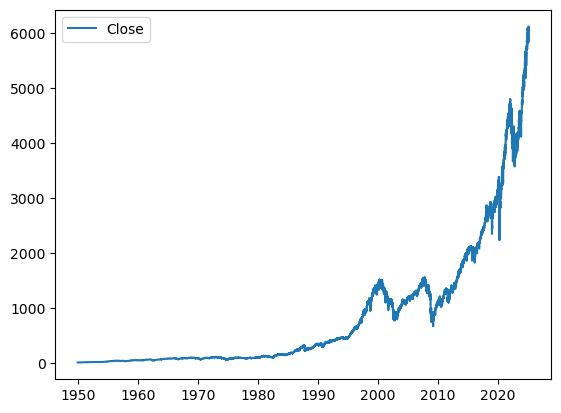

In [6]:
sp500.plot.line(y='Close', use_index=True)

Looking at this, we really can regret not buying the index fund at any point in the last few years.


Now we just remove those extra columns that we don't need. So we'll go ahead and remove the ___Dividends___ column and we'll also remove the ___Stock Splits___ column.<br> These columns are more appropriate for individual stocks not an index so we don't actually need them


In [7]:
sp500 = sp500.drop(['Dividends', 'Stock Splits'],axis=1)
sp500

,Open,High,Low,Close,Volume
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000


## Setting up our Target

The next step is to define our target for the machine learning model. We're going to predict whether the price of a stock will go up or down tomorrow.<br><br>

Some people focus on predicting the exact price of a stock, but I believe this is less crucial for investors. Even if a model accurately predicts the absolute price, you can still lose money if you incorrectly predict the direction of the price movement.<br><br>

Ultimately, what matters most is whether the stock price will rise or fall. This allows investors to make informed decisions about buying or selling.<br><br>

Therefore, our target will be to create a model that accurately predicts the direction of the stock price, enabling us to make profitable investment choices.<br><br>

So first we're going to create a column called ***Tomorrow*** and what this column is going to be is as it's name suggests -tomorrow's price.
<br>And we'll use the pandas shift method to do this.

In [8]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,6067.700195
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,6039.310059
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785


We now have a column that shows tomorrow's price. Based on this, we can define our target variable for the machine learning model.
<br>
The target is simply whether tomorrow's price is greater than today's price. This will result in a boolean value (True or False) indicating whether the price went up.
<br>
To make this suitable for machine learning algorithms, we'll convert the boolean values to integers. We can achieve this using the `astype(int)` method.
<br>
This integer representation (1 for price increase, 0 for no increase) will serve as the target variable for our machine learning model to predict.
<br>

In [9]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,6067.700195,1
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,6039.310059,0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0


- The next step involves addressing the historical data within the DataFrame. While having a large amount of historical data is generally beneficial, in the context of stock market data, going too far back in time can be problematic.
<br><br>
- Market conditions can undergo fundamental shifts over extended periods. As a result, older data may not be as relevant or informative for making accurate future predictions.
<br><br>
To mitigate this potential issue, we'll remove all data that predates the year 1980. This will focus the model's training on more recent market behavior, which is likely to be more reflective of current market trends and dynamics.

In [10]:
sp500 = sp500.loc[dt.date(1980,1,1):].copy()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,105.220001,0
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,106.519997,1
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,106.809998,1
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,108.949997,1
1980-01-08,0.000000,109.290001,106.290001,108.949997,53390000,109.050003,1
...,...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,6067.700195,1
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,6039.310059,0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0


## Training an inital Machine Learning Model

We have now prepared our data and are ready to train our first machine learning model.
<br><br>
For this initial model, we will be using a ___Random Forest Classifier___.
<br><br>
Random Forest is a powerful ensemble learning method that combines the predictions of multiple decision trees. This approach can improve model accuracy and reduce overfitting, which is a common concern in machine learning.

In [11]:
model = RandomForestClassifier(n_estimators = 100,
                              min_samples_split = 100,
                              random_state = 42)
model

RandomForestClassifier(min_samples_split=100, random_state=42)

We need to split our time series data carefully. Standard methods like cross-validation can introduce 'future' information into the training data, a phenomenon known as data leakage. This can lead to unrealistic performance where the model appears to perform well during training but fails miserably in real-world scenarios.
<br><br>
To avoid this, we'll split the data into a training set containing all rows except the last 100, and a test set containing the final 100 rows. This ensures the model learns from past data and is evaluated on truly unseen future data.

In [12]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

We create a predictor list as we do not want our model to train on every column.

In [13]:
predictors = ['Close', 'Open', 'High', 'Low', 'Volume' ]

In [14]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [15]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
preds

2024-09-09    1
2024-09-10    1
2024-09-11    1
2024-09-12    0
2024-09-13    0
             ..
2025-01-27    0
2025-01-28    0
2025-01-29    0
2025-01-30    0
2025-01-31    0
Length: 100, dtype: int32

The precision score indicates the percentage of times the model correctly predicted the market would go up (target = 1) when it actually did go up.
<br><br>
This metric is particularly relevant in this scenario because the goal is to buy stock and hold it, expecting the price to increase. Precision ensures that when the model predicts a price increase, it's likely to be accurate, minimizing the risk of buying stock that subsequently declines in value.
<br><br>
The choice of error metric depends on the specific goals and objectives of the analysis. However, precision score is a suitable metric for this stock market prediction task, where minimizing false positives (predicting an increase when it doesn't occur) is crucial.

In [16]:
precision_score(test['Target'], preds)

1.0

We can see this is not a very good precision score. So when we said the stock price would go up it only went up 66 percent of the time.

<Axes: >

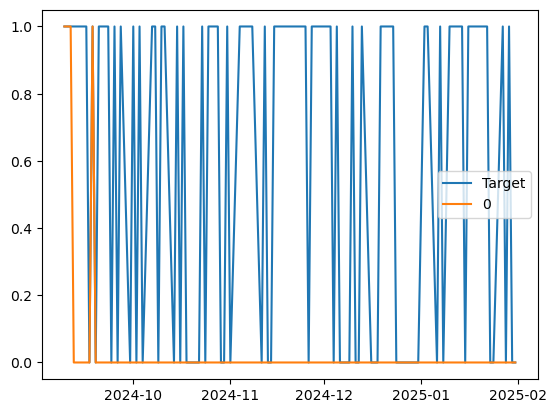

In [17]:
combined = pd.concat([test['Target'], preds],axis=1)
combined.plot()

The orange line represents the model's predictions, and the blue line shows what actually happened in the market.
<br><br>
The visualization clearly demonstrates that my model predominantly predicted that the market would go up. However, in reality, the market mostly went down. This significant disparity between my predictions and the actual market behavior explains why the model's performance was so poor.

## Building a Backtesting System

Currently, we're only testing our model against the last hundred days of data. However, for a real-world stock price model, we need to test it across multiple years of data.
<br><br>
This broader testing allows us to evaluate how our algorithm performs across a wide range of market conditions, giving us greater confidence in its ability to work effectively in the future.

In [18]:
def predict(train, test, model, predictors):
    model.fit(train[predictors],train['Target'])
    preds = pd.Series(model.predict(test[predictors]), index=test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds],axis=1)

    return combined   

We created a prediction function and this will basically just wrap up everything we just did into one function.
<br><br>


In [19]:
def backtest(data, model, predictors, start=250, step=250):
    all_predictions=[]

    for i in range (start, data.shape[0], step):
        train = data.iloc[:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions = predict(train, test, model, predictors)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

We wrote a backtesting function that takes as input:
<br>
- Our S&P 500 data
- A machine learning model
- The predictor variables
- A 'start value' (set to 2500) representing the number of data points used to train the initial model (approximately 10 years of trading data)
- A 'step value' (set to 250) representing the number of data points to move forward after each training and prediction cycle (approximately 1 year of trading data).
  <br><br>
This function will iteratively train and evaluate the model:

- Train the model on the first 10 years of data and use it to predict values for the 11th year.
- Train the model on the first 11 years of data and use it to predict values for the 12th year.
- Continue this process, iteratively increasing the training window by one year and predicting values for the subsequent year, until all available data has been used."
This backtesting procedure allows us to simulate real-world trading scenarios by evaluating the model's performance over different time periods.

In [20]:
predictions = backtest(sp500, model, predictors)

In [21]:
predictions['Predictions'].value_counts()

Predictions
0    6895
1    4220
Name: count, dtype: int64

We can see we predicted that the market would go down on about 4000 days we predicted the market would go up close to about 7000 days


In [22]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5225118483412322

In [23]:
predictions['Target'].value_counts()/predictions.shape[0]

Target
1    0.533603
0    0.466397
Name: count, dtype: float64

Across approximately 10,000 trading days, the model achieved a precision score of 52%. This means that when my model predicted the market would go up, it was correct 52% of the time.
<br>
To assess this performance, I compared it to a simple benchmark: the overall percentage of days when the S&P 500 actually went up. I found that the S&P 500 increased on 53.6% of the days during the analysis period.
<br>
Surprisingly, this simple "buy and hold" strategy would have outperformed the model. While this initial result is not ideal, the backtesting process has provided valuable insights and increased our confidence in our ability to rigorously evaluate and improve the model.

## Adding additional Predictors to our model

Now, we're going to create a variety of rolling averages
<br><br>

In the following cell, especially in the horizons list, the numbers mean the following :
- 2 -> A day
- 5 -> A week
- 60 -> About 2 months
- 250 -> About a year
- 1000 -> About 4 years

In [24]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

# Check and convert "Close" column to numeric (if necessary)
if not pd.api.types.is_numeric_dtype(sp500["Close"]):
    try:
        sp500["Close"] = pd.to_numeric(sp500["Close"])
    except ValueError:
        print("Error: Unable to convert 'Close' column to numeric.")
        # Handle the case where conversion fails

for horizon in horizons:
    # Calculate rolling mean for the "Close" column
    rolling_averages = sp500["Close"].rolling(horizon).mean() 

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1)["Target"].rolling(horizon).sum() 

    new_predictors += [ratio_column, trend_column]

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1980-01-02,0.000000,108.430000,105.290001,105.760002,40610000,105.220001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,0.000000,106.080002,103.260002,105.220001,50480000,106.519997,1,0.997441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,107.080002,105.089996,106.519997,39130000,106.809998,1,1.006140,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,107.800003,105.800003,106.809998,44500000,108.949997,1,1.001359,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,109.290001,106.290001,108.949997,53390000,109.050003,1,1.009918,2.0,1.021547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,6067.700195,1,0.992656,0.0,0.989909,3.0,1.008910,35.0,1.091482,143.0,1.318437,528.0
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,6039.310059,0,1.004588,1.0,0.998427,3.0,1.017542,35.0,1.100632,143.0,1.329937,528.0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1,0.997655,1.0,0.995297,2.0,1.012142,35.0,1.094597,143.0,1.323086,527.0
2025-01-30,6050.750000,6086.640137,6027.459961,6071.169922,4634620000,6040.529785,0,1.002631,1.0,1.002118,2.0,1.016444,36.0,1.099395,144.0,1.329430,527.0


So, we see the new columns having the rolling averages have been added. However, there are a lot of rows having ***NaN*** values. This is due to insuffiecient data. <br>So, we drop those rows having ***NanN*** values.

In [26]:
sp500 = sp500.dropna()

sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1983-12-14,164.929993,164.929993,163.250000,163.330002,85430000,161.660004,0,0.995126,0.0,0.990888,1.0,0.980833,30.0,1.022770,138.0,1.242921,508.0
1983-12-15,163.330002,163.330002,161.660004,161.660004,88300000,162.389999,1,0.994861,0.0,0.984987,1.0,0.971461,30.0,1.011728,137.0,1.229685,508.0
1983-12-16,161.690002,162.389999,161.580002,162.389999,81030000,162.320007,0,1.002253,1.0,0.992689,2.0,0.976569,30.0,1.015698,137.0,1.234713,508.0
1983-12-19,162.339996,162.880005,162.270004,162.320007,75180000,162.000000,0,0.999784,1.0,0.996281,1.0,0.976852,30.0,1.014686,136.0,1.233660,507.0
1983-12-20,162.330002,162.800003,161.639999,162.000000,83740000,163.559998,1,0.999013,0.0,0.997906,1.0,0.975716,29.0,1.012184,135.0,1.230731,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,6121.430176,6128.180176,6088.740234,6101.240234,4214250000,6012.279785,0,0.998570,1.0,1.005073,4.0,1.024379,36.0,1.108535,143.0,1.338587,529.0
2025-01-27,5969.040039,6017.169922,5962.919922,6012.279785,5198750000,6067.700195,1,0.992656,0.0,0.989909,3.0,1.008910,35.0,1.091482,143.0,1.318437,528.0
2025-01-28,6026.970215,6074.540039,5994.629883,6067.700195,4473640000,6039.310059,0,1.004588,1.0,0.998427,3.0,1.017542,35.0,1.100632,143.0,1.329937,528.0
2025-01-29,6057.700195,6062.830078,6012.959961,6039.310059,4115310000,6071.169922,1,0.997655,1.0,0.995297,2.0,1.012142,35.0,1.094597,143.0,1.323086,527.0


## Improving our model

Here, we update our model slightly and change some of our parameters. So we'll increase our number of estimators to 200 and we will reduce our min sample split to 50 and we'll keep our random state the same.


In [27]:
model = model = RandomForestClassifier(n_estimators = 200,
                              min_samples_split = 50,
                              random_state = 42)
model

RandomForestClassifier(min_samples_split=50, n_estimators=200, random_state=42)

Now, we rewrite our prediction function. Here instead of the model just returning 0 and 1, we find out the probability of predeiction. Now, we alter the probability and get our predictions. So, if >=0.6, it'll be a 1, otherwise a 0, instead of simply 0.5.

In [28]:
def predict(train, test, model, predictors):
    model.fit(train[predictors],train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>=0.6] = 1 
    preds[preds<0.6] = 0
    preds = pd.Series(preds, index=test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds],axis=1)

    return combined   

In [29]:
predictions = backtest(sp500, model, new_predictors)

In [30]:
predictions['Predictions'].value_counts()

Predictions
0.0    8710
1.0    1404
Name: count, dtype: int64

In [31]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5683760683760684

So, we can see the model predicts about 56% correctly. The model does have some predictive value.

***

## Authors
<a href="https://www.linkedin.com/in/kinjal-mitra-992147325/" target="_blank">Kinjal Mitra</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | 
| ----------------- | ------- | ---------- | 
| 2024-12-31        | 1.0     | Kinjal Mitra |